In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the CSV file
# df = pd.read_csv('Current_Employment_Statistics__CES__20231023.csv', skipinitialspace=True)
df = pd.read_csv('Current_Employment_Statistics__CES_ (1).csv', skipinitialspace=True)

df.head()

,Area Type,Area Name,Year,Month,Date,Series Code,Industry Title,Seasonally Adjusted,Current Employment
0,County,Alameda County,2014,January,01/01/2014,30000000,Manufacturing,N,65300
1,County,Alameda County,2014,January,01/01/2014,65620000,Health Care and Social Assistance,N,95300
2,County,Alameda County,2014,January,01/01/2014,11000000,Total Farm,N,500
3,County,Alameda County,2014,January,01/01/2014,7000000,Service-Providing,N,600700
4,County,Alameda County,2014,January,01/01/2014,31000000,Durable Goods,N,44200


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1620372 entries, 0 to 1620371
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   Area Type            1620372 non-null  object
 1   Area Name            1620372 non-null  object
 2   Year                 1620372 non-null  int64 
 3   Month                1620372 non-null  object
 4   Date                 1620372 non-null  object
 5   Series Code          1620372 non-null  int64 
 6   Industry Title       1620372 non-null  object
 7   Seasonally Adjusted  1620372 non-null  object
 8   Current Employment   1620372 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 111.3+ MB


In [4]:
# Set the year for filtering data
start_year = 2015
end_year = 2022
year_df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]

# Group by year and calculate the total number of employment
employ_df = year_df.groupby('Year')['Current Employment'].sum()

# Calculate average
avg_employ = employ_df.mean()

# Highlight max employment
max_employ_year = employ_df.idxmax()
max_employ_val = employ_df.max()

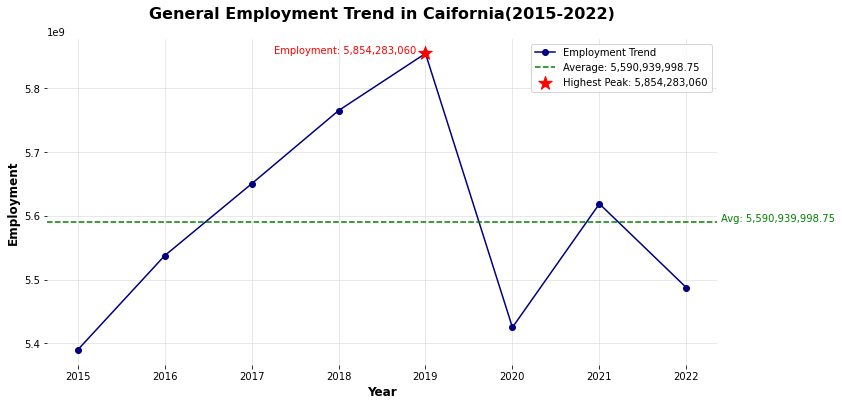

In [5]:
# Create plot
plt.figure(figsize=(12, 6)) 
plt.plot(employ_df.index, employ_df.values, marker='o', color='navy', label='Employment Trend')
plt.axhline(y=avg_employ, color='green', linestyle='--', label=f'Average: {avg_employ:,}')
plt.text(employ_df.index[-1] + 0.4, avg_employ, f'Avg: {avg_employ:,}', color='green', fontsize=10)
plt.scatter(max_employ_year, max_employ_val, color='red', marker='*', s=200, label=f'Highest Peak: {max_employ_val:,}', zorder=5)  
plt.text(max_employ_year - 0.1, max_employ_val, f'Employment: {max_employ_val:,}', color='red', fontsize=10, ha='right')
plt.title('General Employment Trend in Caifornia(2015-2022)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Employment', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(color='lightgray', linewidth=0.5)
plt.box(False)
# plt.tight_layout()
plt.show()

In [6]:
# Filter and create new dataset
sf_df = df[(df['Year'] > 2018) & (df['Area Name'] == 'San Francisco County')]
sf_df.head()

,Area Type,Area Name,Year,Month,Date,Series Code,Industry Title,Seasonally Adjusted,Current Employment
244684,County,San Francisco County,2019,January,01/01/2019,0,Total Nonfarm,N,742000
244685,County,San Francisco County,2019,January,01/01/2019,6000000,Goods Producing,N,36500
244686,County,San Francisco County,2019,January,01/01/2019,70710000,"Arts, Entertainment, and Recreation",N,13200
244687,County,San Francisco County,2019,January,01/01/2019,42000000,Retail Trade,N,45900
244688,County,San Francisco County,2019,January,01/01/2019,70000000,Leisure and Hospitality,N,97000


In [7]:
sf_df['Year'].unique()

array([2019, 2020, 2021, 2022], dtype=int64)

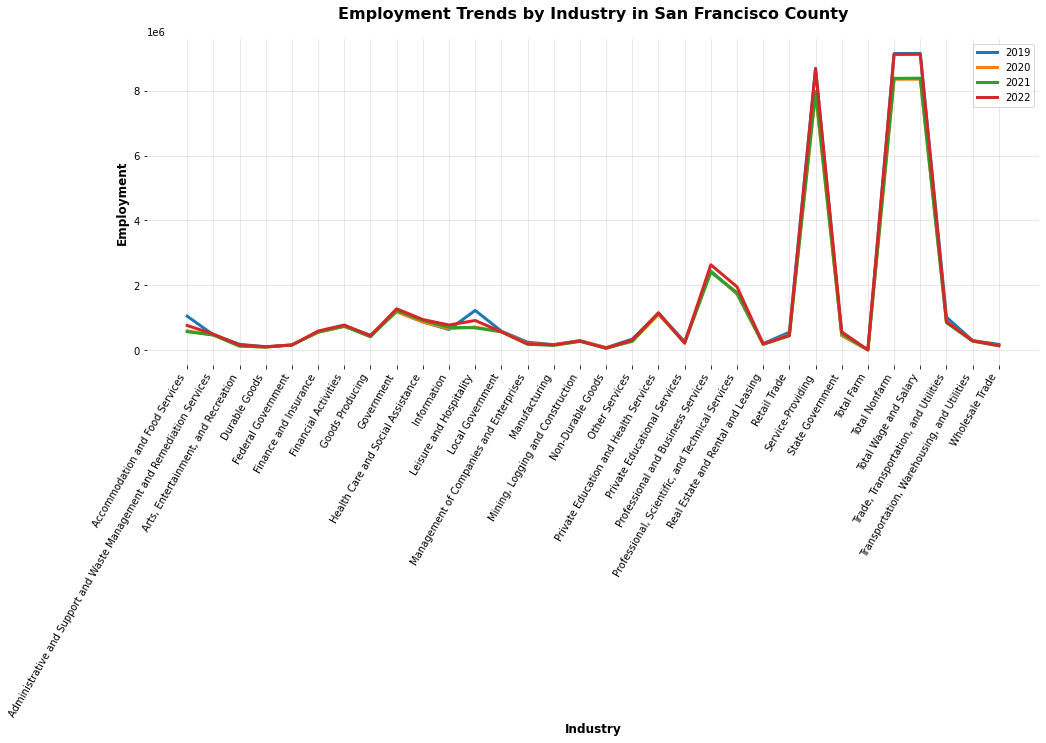

In [8]:
# Remove missing values in the 'Industry Title' column
sf_df = sf_df.dropna(subset=['Industry Title'])

# Sort the values
sf_df = sf_df.sort_values(by=['Industry Title', 'Year'])

# Group by industry and year, and sum the current employment for each group
industry_df = sf_df.groupby(['Industry Title', 'Year'])['Current Employment'].sum().unstack()

# Create plot
plt.figure(figsize=(16, 6))
for industry in industry_df.columns:
    plt.plot(industry_df.index, industry_df[industry], label=industry, linewidth=3)
plt.title('Employment Trends by Industry in San Francisco County', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Industry', fontsize=12, fontweight='bold')
plt.ylabel('Employment', fontsize=12, fontweight='bold')
plt.xticks(rotation=60, ha='right')
plt.legend() #bbox_to_anchor=(1, 1),
plt.grid(color='lightgray', linewidth=0.5)
plt.box(False)
# plt.tight_layout()
plt.show()

In [9]:
# List of tech related industry titles
tech_industries = [
    'Computer and Electronic Product Manufacturing',
    'Computer Systems Design and Related Services',
    'Data Processing, Hosting & Related Services',
    'Electronic Computer Manufacturing',
    'Electronic Instrument Manufacturing',
    'Software Publishers',
    'Telecommunications',
    'Semiconductor and Electronic Component Manufacturing',
]

# Create new dataset including only tech industries
tech_df = df[df['Industry Title'].isin(tech_industries)]

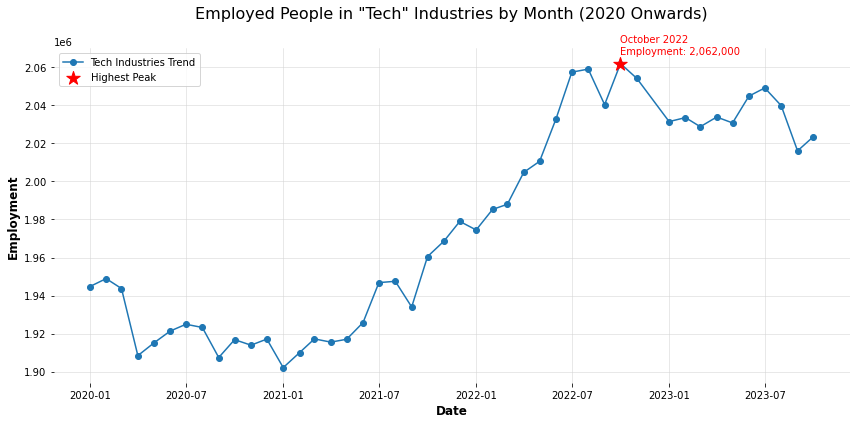

In [10]:
# Filter data for the years 2020 onwards
year_tech_df = tech_df[tech_df['Year'] >= 2020]

# Group by month and calculate total employment
monthly_employ = year_tech_df.groupby(['Year', 'Month'])['Current Employment'].sum()

# Reset the index to separate columns
monthly_employ = monthly_employ.reset_index()

# Convert columns to a datetime format
monthly_employ['Date'] = pd.to_datetime(monthly_employ['Year'].astype(str) + '-' + monthly_employ['Month'], format='%Y-%B')

# Sort the data
monthly_employ = monthly_employ.sort_values(by='Date')

# Highlight the highest peak
peak_point = monthly_employ.loc[monthly_employ['Current Employment'].idxmax()]

# Create plot
plt.figure(figsize=(12, 6))
plt.plot(monthly_employ['Date'], monthly_employ['Current Employment'], marker='o', label='Tech Industries Trend')
plt.scatter(peak_point['Date'], peak_point['Current Employment'], color='red', marker='*', s=200, label='Highest Peak', zorder=5)

# Annotate the highest peak
annotation_text = f'{peak_point["Date"].strftime("%B %Y")}\nEmployment: {peak_point["Current Employment"]:,}'
plt.annotate(annotation_text, 
             xy=(peak_point['Date'], peak_point['Current Employment']), 
             xytext=(peak_point['Date'], peak_point['Current Employment'] + 5000),
             fontsize=10,
             color='red')

plt.title('Employed People in "Tech" Industries by Month (2020 Onwards)', fontsize=16, pad=30) 
plt.xlabel('Date', fontsize=12, fontweight='bold')
plt.ylabel('Employment', fontsize=12, fontweight='bold')
plt.legend(loc = 'upper left')
plt.grid(color='lightgray', linewidth=0.5)
plt.box(False)
plt.tight_layout()
plt.show()

In [11]:
# Filter data for the years 2019 and 2022
year_2019 = tech_df[tech_df['Year'] == 2019]
year_2022 = tech_df[tech_df['Year'] == 2022]

# Group by industry and calculate total employment
employ_2019 = year_2019.groupby('Industry Title')['Current Employment'].sum()
employ_2022 = year_2022.groupby('Industry Title')['Current Employment'].sum()

# Calculate the percentage change
percent_df = ((employ_2022 - employ_2019) / employ_2019) * 100

# Create a table
employ_table = pd.DataFrame({
    'Industry': employ_2019.index,
    '2019': employ_2019.values,
    '2022': employ_2022.values,
    '% Change': percent_df.values
})

# Customize table
style_employ_table = employ_table.style \
    .bar(subset=['% Change'], align='mid', color=['#d65f5f', '#5fba7d']) \
    .set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])

# Show table
style_employ_table

,Industry,2019,2022,% Change
0,Computer Systems Design and Related Services,7940500,7483100,-5.760343
1,Computer and Electronic Product Manufacturing,7631700,7346600,-3.735734
2,"Data Processing, Hosting & Related Services",818300,1043000,27.459367
3,Electronic Computer Manufacturing,1428800,1442100,0.930851
4,Electronic Instrument Manufacturing,2119300,2112000,-0.344453
5,Software Publishers,1294300,1411100,9.024183
6,Telecommunications,1817800,1431400,-21.256464


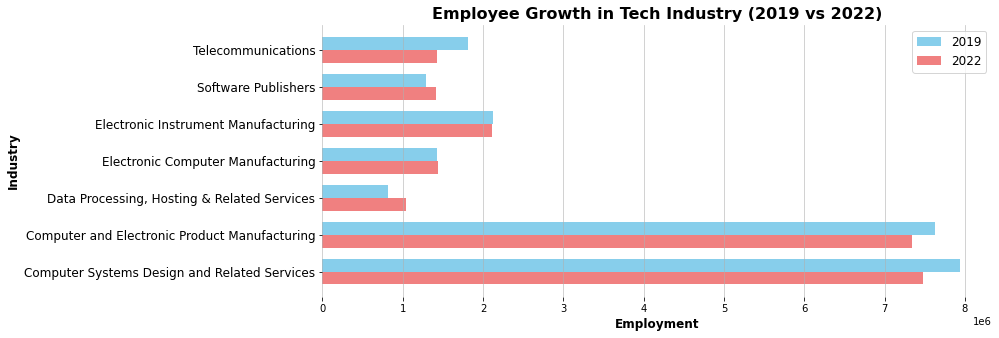

In [12]:
# Create plot
plt.figure(figsize=(12, 5))
bar_height = 0.35
bar_positions_2019 = range(len(employ_table))
bar_positions_2022 = [pos + bar_height for pos in bar_positions_2019]
plt.barh(bar_positions_2019, employ_table['2022'], height=bar_height, label='2022', color='lightcoral')
plt.barh(bar_positions_2022, employ_table['2019'], height=bar_height, label='2019', color='skyblue')
plt.xlabel('Employment', fontsize=12, fontweight='bold')
plt.ylabel('Industry', fontsize=12, fontweight='bold')
plt.title('Employee Growth in Tech Industry (2019 vs 2022)', fontsize=16, fontweight='bold')
plt.yticks([pos + bar_height / 2 for pos in bar_positions_2019], employ_table['Industry'], fontsize=12)

# Switch the order of legend labels
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1], fontsize=12)
plt.grid(axis='x', alpha=0.7)
plt.box(False)
# plt.tight_layout()
plt.show()